In [44]:
import pandas as pd 
import numpy as np
class_majority = pd.read_csv("Datasets/modified_majority_class.csv")
class_majority=class_majority.drop(columns=['Unnamed: 0.1' , 'Unnamed: 0'])
class_majority.head()


,buying,maint,doors,persons,lug_boot,safety,result,C1,C2,C3
0,3,0,0,1,2,2,0,3,2,6
1,0,2,0,1,2,2,0,2,6,2
2,3,3,3,2,1,0,0,3,2,6
3,2,3,3,1,0,1,0,6,4,4
4,0,3,1,2,1,0,0,4,0,5


In [45]:
class_majority=class_majority.reset_index(drop=False)
class_majority.head()

,index,buying,maint,doors,persons,lug_boot,safety,result,C1,C2,C3
0,0,3,0,0,1,2,2,0,3,2,6
1,1,0,2,0,1,2,2,0,2,6,2
2,2,3,3,3,2,1,0,0,3,2,6
3,3,2,3,3,1,0,1,0,6,4,4
4,4,0,3,1,2,1,0,0,4,0,5


In [46]:
clustering_result=class_majority[['index','C1','C2','C3']]
clustering_result.rename(columns={'index': 'Datapoint(x)'}, inplace=True)
clustering_result

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11748\2258915922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_result.rename(columns={'index': 'Datapoint(x)'}, inplace=True)


,Datapoint(x),C1,C2,C3
0,0,3,2,6
1,1,2,6,2
2,2,3,2,6
3,3,6,4,4
4,4,4,0,5
...,...,...,...,...
953,953,3,2,0
954,954,1,3,3
955,955,5,5,0
956,956,0,1,1


In [47]:
num_of_clusters=7
C1_datapoints={}
C2_datapoints={}
C3_datapoints={}
def clusters(dictionary,clustername):
  for i in clustering_result.index:
    if clustering_result.loc[i,clustername] not in dictionary.keys():
       dictionary[clustering_result.loc[i,clustername]]=[clustering_result.loc[i,'Datapoint(x)']]
    else:
      dictionary[clustering_result.loc[i,clustername]].append(clustering_result.loc[i,'Datapoint(x)'])
  return dictionary
C1_datapoints=clusters(C1_datapoints,'C1')
C2_datapoints=clusters(C2_datapoints,'C2')
C3_datapoints=clusters(C3_datapoints,'C3')
print("C1 clusters :",C1_datapoints)
print("C3 clusters :",C3_datapoints)
def common_member(list1,list2):
  set1=set(list1)
  set2=set(list2)
  return len(set1.intersection(set2))
contingency_matrix1=[]
for i in range(7):
  common=[]
  for j in range(7):
    common_element=common_member(C3_datapoints[i],C1_datapoints[j])
    common.append(common_element)
  contingency_matrix1.append(common)
contingency_df1=pd.DataFrame(contingency_matrix1,index=['C30','C31','C32','C33','C34','C35','C36'],columns=['C10','C11','C12','C13','C14','C15','C16'])
contingency_df1

C1 clusters : {3: [0, 2, 26, 28, 35, 37, 46, 62, 69, 75, 79, 81, 97, 105, 107, 111, 117, 136, 140, 144, 145, 153, 159, 166, 169, 173, 181, 185, 186, 187, 190, 208, 210, 214, 220, 223, 225, 230, 235, 246, 261, 263, 271, 279, 284, 289, 298, 311, 313, 315, 330, 331, 340, 342, 343, 344, 355, 359, 366, 367, 376, 387, 388, 395, 408, 426, 427, 428, 433, 434, 436, 444, 447, 454, 466, 488, 492, 502, 505, 506, 540, 543, 549, 556, 581, 584, 585, 588, 589, 594, 602, 603, 614, 623, 635, 639, 644, 653, 668, 681, 682, 683, 697, 698, 701, 703, 748, 752, 754, 765, 768, 769, 773, 776, 781, 784, 791, 795, 798, 803, 819, 822, 825, 832, 838, 847, 849, 853, 859, 861, 862, 875, 887, 888, 898, 903, 908, 921, 923, 937, 939, 942, 945, 950, 953], 2: [1, 11, 17, 38, 39, 42, 45, 53, 55, 59, 61, 72, 74, 80, 109, 110, 116, 126, 139, 150, 154, 156, 162, 170, 172, 176, 189, 194, 197, 203, 212, 216, 221, 224, 228, 229, 231, 232, 234, 248, 251, 252, 253, 255, 265, 269, 270, 277, 285, 300, 303, 335, 351, 365, 378, 380, 3

,C10,C11,C12,C13,C14,C15,C16
C30,0,0,0,26,0,97,0
C31,118,0,0,0,0,0,30
C32,0,0,83,0,38,0,0
C33,20,126,0,0,0,0,0
C34,0,0,59,0,0,0,100
C35,0,0,0,0,115,27,0
C36,0,0,0,119,0,0,0


In [48]:
print("C1 clusters :",C1_datapoints)
print("C2 clusters :",C2_datapoints)
contingency_matrix2=[]
for i in range(7):
  common=[]
  for j in range(7):
    common_element=common_member(C2_datapoints[i],C1_datapoints[j])
    common.append(common_element)
  contingency_matrix2.append(common)
contingency_df2=pd.DataFrame(contingency_matrix2,index=['C20','C21','C22','C23','C24','C25','C26'],columns=['C10','C11','C12','C13','C14','C15','C16'])
contingency_df2

C1 clusters : {3: [0, 2, 26, 28, 35, 37, 46, 62, 69, 75, 79, 81, 97, 105, 107, 111, 117, 136, 140, 144, 145, 153, 159, 166, 169, 173, 181, 185, 186, 187, 190, 208, 210, 214, 220, 223, 225, 230, 235, 246, 261, 263, 271, 279, 284, 289, 298, 311, 313, 315, 330, 331, 340, 342, 343, 344, 355, 359, 366, 367, 376, 387, 388, 395, 408, 426, 427, 428, 433, 434, 436, 444, 447, 454, 466, 488, 492, 502, 505, 506, 540, 543, 549, 556, 581, 584, 585, 588, 589, 594, 602, 603, 614, 623, 635, 639, 644, 653, 668, 681, 682, 683, 697, 698, 701, 703, 748, 752, 754, 765, 768, 769, 773, 776, 781, 784, 791, 795, 798, 803, 819, 822, 825, 832, 838, 847, 849, 853, 859, 861, 862, 875, 887, 888, 898, 903, 908, 921, 923, 937, 939, 942, 945, 950, 953], 2: [1, 11, 17, 38, 39, 42, 45, 53, 55, 59, 61, 72, 74, 80, 109, 110, 116, 126, 139, 150, 154, 156, 162, 170, 172, 176, 189, 194, 197, 203, 212, 216, 221, 224, 228, 229, 231, 232, 234, 248, 251, 252, 253, 255, 265, 269, 270, 277, 285, 300, 303, 335, 351, 365, 378, 380, 3

,C10,C11,C12,C13,C14,C15,C16
C20,0,0,0,0,152,0,0
C21,138,0,0,0,0,0,0
C22,0,0,0,145,0,1,0
C23,0,126,0,0,0,0,0
C24,0,0,0,0,0,0,130
C25,0,0,0,0,0,123,0
C26,0,0,142,0,1,0,0


In [49]:
contigency_mat=pd.concat([contingency_df2, contingency_df1])
contigency_mat

,C10,C11,C12,C13,C14,C15,C16
C20,0,0,0,0,152,0,0
C21,138,0,0,0,0,0,0
C22,0,0,0,145,0,1,0
C23,0,126,0,0,0,0,0
C24,0,0,0,0,0,0,130
C25,0,0,0,0,0,123,0
C26,0,0,142,0,1,0,0
C30,0,0,0,26,0,97,0
C31,118,0,0,0,0,0,30
C32,0,0,83,0,38,0,0


In [50]:
def union(list1, list2):
  l = list1 + list2
  return len(set(l))
def common_member(list1,list2):
  set1=set(list1)
  set2=set(list2)
  return len(set1.intersection(set2))
union_df1 = []
common_df1 = []
for i in range(7):
  uni = []
  common = []
  for j in range(7):
    union_element = union(C3_datapoints[i],C1_datapoints[j])
    common_element = common_member(C3_datapoints[i],C1_datapoints[j])
    uni.append(union_element)
    common.append(common_element)
  union_df1.append(uni)
  common_df1.append(common)
confusion_mat1 = np.divide(common_df1, union_df1)
confusion_mat1=pd.DataFrame(confusion_mat1,index=['C30','C31','C32','C33','C34','C35','C36'],columns=['C10','C11','C12','C13','C14','C15','C16'])
common_df1, union_df1
confusion_mat1

,C10,C11,C12,C13,C14,C15,C16
C30,0.000000,0.000000,0.000000,0.107438,0.000000,0.646667,0.000000
C31,0.702381,0.000000,0.000000,0.000000,0.000000,0.000000,0.120968
C32,0.000000,0.000000,0.461111,0.000000,0.161017,0.000000,0.000000
C33,0.075758,0.863014,0.000000,0.000000,0.000000,0.000000,0.000000
C34,0.000000,0.000000,0.243802,0.000000,0.000000,0.000000,0.529101
C35,0.000000,0.000000,0.000000,0.000000,0.638889,0.112971,0.000000
C36,0.000000,0.000000,0.000000,0.820690,0.000000,0.000000,0.000000


In [51]:
union_df2 = []
common_df2 = []
for i in range(7):
  uni = []
  common = []
  for j in range(7):
    union_element = union(C2_datapoints[i],C1_datapoints[j])
    common_element = common_member(C2_datapoints[i],C1_datapoints[j])
    uni.append(union_element)
    common.append(common_element)
  union_df2.append(uni)
  common_df2.append(common)
confusion_mat2 = np.divide(common_df2, union_df2)
confusion_mat2=pd.DataFrame(confusion_mat2,index=['C20','C21','C22','C23','C24','C25','C26'],columns=['C10','C11','C12','C13','C14','C15','C16'])
common_df2, union_df2
confusion_mat2

,C10,C11,C12,C13,C14,C15,C16
C20,0.0,0.0,0.000000,0.000000,0.993464,0.000000,0.0
C21,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
C22,0.0,0.0,0.000000,0.993151,0.000000,0.003717,0.0
C23,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0
C24,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
C25,0.0,0.0,0.000000,0.000000,0.000000,0.991935,0.0
C26,0.0,0.0,0.993007,0.000000,0.003390,0.000000,0.0


In [52]:
confusion_mat=pd.concat([confusion_mat2, confusion_mat1])
print("-----------Confusion matrix----------")
confusion_mat


-----------Confusion matrix----------


,C10,C11,C12,C13,C14,C15,C16
C20,0.000000,0.000000,0.000000,0.000000,0.993464,0.000000,0.000000
C21,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C22,0.000000,0.000000,0.000000,0.993151,0.000000,0.003717,0.000000
C23,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
C25,0.000000,0.000000,0.000000,0.000000,0.000000,0.991935,0.000000
C26,0.000000,0.000000,0.993007,0.000000,0.003390,0.000000,0.000000
C30,0.000000,0.000000,0.000000,0.107438,0.000000,0.646667,0.000000
C31,0.702381,0.000000,0.000000,0.000000,0.000000,0.000000,0.120968
C32,0.000000,0.000000,0.461111,0.000000,0.161017,0.000000,0.000000


In [53]:
CCluster = []
index=[]
CLabel = ['C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16']
for i in range(len(confusion_mat)):
  l =confusion_mat.iloc[i]
  l = list(l)
  ind = l.index(max(l))
  index.append(ind)
  CCluster.append(CLabel[ind])
CCluster


['C14',
 'C10',
 'C13',
 'C11',
 'C16',
 'C15',
 'C12',
 'C15',
 'C10',
 'C12',
 'C11',
 'C16',
 'C14',
 'C13']

In [54]:
confusion_matrix = confusion_mat
confusion_matrix['CCluster'] = CCluster
confusion_matrix['index'] = index
confusion_matrix.head(14)

,C10,C11,C12,C13,C14,C15,C16,CCluster,index
C20,0.000000,0.000000,0.000000,0.000000,0.993464,0.000000,0.000000,C14,4
C21,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C10,0
C22,0.000000,0.000000,0.000000,0.993151,0.000000,0.003717,0.000000,C13,3
C23,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C11,1
C24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,C16,6
C25,0.000000,0.000000,0.000000,0.000000,0.000000,0.991935,0.000000,C15,5
C26,0.000000,0.000000,0.993007,0.000000,0.003390,0.000000,0.000000,C12,2
C30,0.000000,0.000000,0.000000,0.107438,0.000000,0.646667,0.000000,C15,5
C31,0.702381,0.000000,0.000000,0.000000,0.000000,0.000000,0.120968,C10,0
C32,0.000000,0.000000,0.461111,0.000000,0.161017,0.000000,0.000000,C12,2


In [55]:
confusion_dict = confusion_matrix['index'].to_dict()
print(confusion_dict)


{'C20': 4, 'C21': 0, 'C22': 3, 'C23': 1, 'C24': 6, 'C25': 5, 'C26': 2, 'C30': 5, 'C31': 0, 'C32': 2, 'C33': 1, 'C34': 6, 'C35': 4, 'C36': 3}


In [56]:
new_clustering_result = pd.DataFrame(clustering_result)
def map_values(value):
    return confusion_dict.get('C2' + str(value), value)

# Replace values in column 'C2'
new_clustering_result['C2'] = new_clustering_result['C2'].apply(map_values)

# Function to map values from dictionary
def map_values(value):
    return confusion_dict.get('C3' + str(value), value)

# Replace values in column 'C3'
new_clustering_result['C3'] = clustering_result['C3'].apply(map_values)
print(new_clustering_result)

     Datapoint(x)  C1  C2  C3
0               0   3   3   3
1               1   2   2   2
2               2   3   3   3
3               3   6   6   6
4               4   4   4   4
..            ...  ..  ..  ..
953           953   3   3   5
954           954   1   1   1
955           955   5   5   5
956           956   0   0   0
957           957   4   4   4

[958 rows x 4 columns]


In [57]:
#Majority Voting

C = []
for i in range(len(new_clustering_result)):
  l = new_clustering_result.iloc[i]
  l = list(l[1:])
  majority_label = max(set(l), key = l.count)
  C.append(majority_label)

new_clustering_result['C'] = C
new_clustering_result

,Datapoint(x),C1,C2,C3,C
0,0,3,3,3,3
1,1,2,2,2,2
2,2,3,3,3,3
3,3,6,6,6,6
4,4,4,4,4,4
...,...,...,...,...,...
953,953,3,3,5,3
954,954,1,1,1,1
955,955,5,5,5,5
956,956,0,0,0,0


In [58]:
consensus_clustering_result=new_clustering_result.drop(columns=['C1', 'C2', 'C3'], axis = 1)
consensus_clustering_result

,Datapoint(x),C
0,0,3
1,1,2
2,2,3
3,3,6
4,4,4
...,...,...
953,953,3
954,954,1
955,955,5
956,956,0


In [59]:
class_majority.rename(columns={'index': 'Datapoint(x)'}, inplace=True)
class_majority=class_majority.merge(consensus_clustering_result,on='Datapoint(x)')
class_majority=class_majority.drop(columns=['C1','C2','C3'])
class_majority

,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C
0,0,3,0,0,1,2,2,0,3
1,1,0,2,0,1,2,2,0,2
2,2,3,3,3,2,1,0,0,3
3,3,2,3,3,1,0,1,0,6
4,4,0,3,1,2,1,0,0,4
...,...,...,...,...,...,...,...,...,...
953,953,3,0,2,2,1,1,0,3
954,954,1,1,0,0,0,1,0,1
955,955,3,1,0,0,2,0,0,5
956,956,1,3,1,0,0,1,0,0


Cluster: 0


In [60]:
cluster_0 = class_majority[class_majority['C']==0]
cluster_0

,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C
14,14,1,3,3,0,2,2,0,0
30,30,2,1,3,0,1,0,0,0
31,31,2,1,2,0,2,2,0,0
32,32,2,1,3,0,2,0,0,0
41,41,1,3,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
922,922,1,0,0,1,2,1,0,0
925,925,2,1,0,2,2,0,0,0
932,932,1,3,0,2,1,1,0,0
941,941,1,3,0,2,0,1,0,0


Cluster: 1


In [61]:

cluster_1 = class_majority[class_majority['C']==1]
cluster_1

,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C
12,12,1,1,1,1,2,1,0,1
16,16,1,1,1,0,1,1,0,1
22,22,1,0,2,2,0,1,0,1
33,33,1,2,0,2,0,1,0,1
34,34,1,0,3,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...
943,943,1,2,0,0,0,1,0,1
946,946,1,1,3,1,2,1,0,1
948,948,1,1,0,2,2,0,0,1
949,949,1,0,3,2,0,1,0,1


Cluster: 2

In [62]:
cluster_2 = class_majority[class_majority['C']==2]
cluster_2

,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C
1,1,0,2,0,1,2,2,0,2
11,11,0,2,3,0,2,1,0,2
17,17,0,1,2,0,1,1,0,2
38,38,0,1,2,0,1,0,0,2
39,39,0,1,1,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...
920,920,0,1,3,2,1,1,0,2
926,926,0,2,1,1,2,1,0,2
936,936,2,3,1,0,2,0,0,2
938,938,2,3,0,1,1,2,0,2


Cluster: 3


In [63]:

cluster_3 = class_majority[class_majority['C']==3]
cluster_3

,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C
0,0,3,0,0,1,2,2,0,3
2,2,3,3,3,2,1,0,0,3
26,26,3,0,0,0,2,2,0,3
28,28,3,3,1,1,1,2,0,3
35,35,3,3,3,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...
939,939,3,3,1,0,0,2,0,3
942,942,3,3,3,0,0,1,0,3
945,945,3,3,1,1,0,1,0,3
950,950,3,0,2,2,2,1,0,3


Cluster: 4

In [64]:

cluster_4 = class_majority[class_majority['C']==4]
cluster_4

,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C
4,4,0,3,1,2,1,0,0,4
6,6,0,0,3,0,1,1,0,4
15,15,0,3,2,0,1,0,0,4
36,36,0,0,2,1,1,1,0,4
44,44,0,3,2,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...
927,927,0,3,2,0,1,1,0,4
931,931,0,3,0,2,2,0,0,4
940,940,0,3,1,0,1,1,0,4
947,947,0,0,3,0,2,2,0,4


Cluster: 5

In [65]:

cluster_5 = class_majority[class_majority['C']==5]
cluster_5

,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C
7,7,3,2,0,0,1,0,0,5
8,8,3,1,0,1,0,1,0,5
18,18,3,2,1,1,1,1,0,5
19,19,3,0,3,1,0,2,0,5
21,21,3,2,2,0,2,1,0,5
...,...,...,...,...,...,...,...,...,...
917,917,3,0,3,1,1,1,0,5
928,928,3,0,3,2,1,0,0,5
929,929,3,0,3,1,0,0,0,5
934,934,3,0,3,0,2,0,0,5


Cluster: 6

In [66]:

cluster_6 = class_majority[class_majority['C']==6]
cluster_6

,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C
3,3,2,3,3,1,0,1,0,6
5,5,2,0,1,0,1,0,0,6
9,9,2,3,3,2,2,2,0,6
10,10,2,2,1,0,2,2,0,6
13,13,2,2,1,0,1,2,0,6
...,...,...,...,...,...,...,...,...,...
924,924,2,2,0,1,0,1,0,6
930,930,2,3,2,1,0,1,0,6
935,935,2,0,3,1,1,1,0,6
944,944,2,3,2,1,2,2,0,6


Centroid of different clusters:


In [67]:

from sklearn.neighbors import NearestCentroid
class_majority
X=class_majority.drop(columns=['Datapoint(x)','result','C'])
y=class_majority.C
clf=NearestCentroid()
clf.fit(X,y)
data_centroids=clf.centroids_
pd.DataFrame(data_centroids)

,0,1,2,3,4,5
0,1.347826,1.746377,1.217391,0.768116,1.094203,1.036232
1,1.000000,1.198413,1.603175,0.611111,1.023810,0.992063
2,0.405594,1.790210,1.307692,0.713287,1.153846,1.090909
3,3.000000,1.820690,1.337931,0.986207,1.020690,1.000000
4,0.315789,1.763158,1.565789,0.868421,1.019737,1.059211
5,3.000000,1.233871,1.604839,0.806452,1.056452,1.088710
6,2.000000,1.384615,1.584615,0.669231,1.153846,1.161538


In [68]:

#Finding 5 datapoints in cluster 4

import math

centroid_0 = list(data_centroids[0])


l=list(cluster_0.values[0])
l=l[1:-2]
print(len(centroid_0),len(l))

distances = []

for i in range(len(cluster_0)):
  l=list(cluster_0.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_0[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_0_with_distance = cluster_0
cluster_0_with_distance['Distance from centroid'] = distances
cluster_0_with_distance = cluster_0_with_distance.sort_values('Distance from centroid')
cluster_0_with_distance

6 6


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11748\3456985420.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0_with_distance['Distance from centroid'] = distances


,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C,Distance from centroid
368,368,2,1,1,1,1,1,0,0,1.045765
521,521,2,1,1,0,1,1,0,0,1.276659
802,802,2,1,2,1,1,1,0,0,1.287961
49,49,1,3,1,1,1,1,0,0,1.343045
440,440,2,1,1,1,2,1,0,0,1.380297
...,...,...,...,...,...,...,...,...,...,...
98,98,1,3,3,0,0,2,0,0,2.754338
101,101,1,3,3,0,0,0,0,0,2.780523
77,77,1,0,0,2,2,2,0,0,2.814198
645,645,1,0,0,2,2,0,0,0,2.839831


In [69]:

#Finding 5 datapoints in cluster 4

import math

centroid_1 = list(data_centroids[1])


l=list(cluster_1.values[0])
l=l[1:-2]
print(len(centroid_1),len(l))

distances = []

for i in range(len(cluster_1)):
  l=list(cluster_1.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_1[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_1_with_distance = cluster_1
cluster_1_with_distance['Distance from centroid'] = distances
cluster_1_with_distance = cluster_1_with_distance.sort_values('Distance from centroid')
cluster_1_with_distance

6 6


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11748\1466289395.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_with_distance['Distance from centroid'] = distances


,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C,Distance from centroid
288,288,1,1,2,1,1,1,0,1,0.590510
233,233,1,1,1,1,1,1,0,1,0.745018
309,309,1,1,2,0,1,1,0,1,0.755596
16,16,1,1,1,0,1,1,0,1,0.881631
94,94,1,2,2,1,1,1,0,1,0.975642
...,...,...,...,...,...,...,...,...,...,...
949,949,1,0,3,2,0,1,0,1,2.522811
948,948,1,1,0,2,2,0,0,1,2.544737
361,361,1,1,0,2,2,2,0,1,2.550967
106,106,1,2,0,2,2,0,0,1,2.660613


In [70]:

#Finding 5 datapoints in cluster 4

import math

centroid_2 = list(data_centroids[2])


# l=list(cluster_2.values[0])
# l=l[1:-2]
# print(len(centroid_2),len(l))

distances = []

for i in range(len(cluster_2)):
  l=list(cluster_2.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_2[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_2_with_distance = cluster_2
cluster_2_with_distance['Distance from centroid'] = distances
cluster_2_with_distance = cluster_2_with_distance.sort_values('Distance from centroid')
cluster_2_with_distance

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11748\2670615115.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_with_distance['Distance from centroid'] = distances


,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C,Distance from centroid
680,680,0,2,2,1,1,1,0,2,0.895515
828,828,0,1,1,1,1,1,0,2,0.998875
926,926,0,2,1,1,2,1,0,2,1.053394
53,53,0,1,1,0,1,1,0,2,1.193450
596,596,0,2,2,1,2,1,0,2,1.222397
...,...,...,...,...,...,...,...,...,...,...
335,335,2,3,0,2,1,2,0,2,2.867320
696,696,2,3,0,0,0,2,0,2,2.895232
690,690,2,3,0,0,0,0,0,2,2.957364
60,60,0,0,3,2,0,1,0,2,3.037848


In [71]:

#Finding 5 datapoints in cluster 4

import math

centroid_3 = list(data_centroids[3])


# l=list(cluster_3.values[0])
# l=l[1:-2]
# print(len(centroid_3),len(l))

distances = []

for i in range(len(cluster_3)):
  l=list(cluster_3.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_3[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_3_with_distance = cluster_3
cluster_3_with_distance['Distance from centroid'] = distances
cluster_3_with_distance = cluster_3_with_distance.sort_values('Distance from centroid')
cluster_3_with_distance

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11748\14205752.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3_with_distance['Distance from centroid'] = distances


,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C,Distance from centroid
937,937,3,3,1,1,1,1,0,3,1.227024
144,144,3,3,1,1,2,1,0,3,1.569780
75,75,3,3,1,0,1,1,0,3,1.574167
28,28,3,3,1,1,1,2,0,3,1.582905
220,220,3,3,1,1,1,0,0,3,1.582905
...,...,...,...,...,...,...,...,...,...,...
210,210,3,0,0,0,2,0,0,3,2.834894
26,26,3,0,0,0,2,2,0,3,2.834894
223,223,3,0,0,2,2,2,0,3,2.844608
395,395,3,0,0,0,0,0,0,3,2.849453


In [72]:

#Finding 5 datapoints in cluster 4

import math

centroid_4 = list(data_centroids[4])


# l=list(cluster_3.values[0])
# l=l[1:-2]
# print(len(centroid_3),len(l))

distances = []

for i in range(len(cluster_4)):
  l=list(cluster_4.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_4[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_4_with_distance = cluster_4
cluster_4_with_distance['Distance from centroid'] = distances
cluster_4_with_distance = cluster_4_with_distance.sort_values('Distance from centroid')
cluster_4_with_distance

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11748\3913357524.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4_with_distance['Distance from centroid'] = distances


,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C,Distance from centroid
257,257,0,3,2,1,1,1,0,4,1.356189
239,239,0,3,1,1,1,1,0,4,1.403862
927,927,0,3,2,0,1,1,0,4,1.605020
940,940,0,3,1,0,1,1,0,4,1.645500
628,628,0,3,2,1,1,2,0,4,1.649493
...,...,...,...,...,...,...,...,...,...,...
835,835,3,1,3,2,0,1,0,4,3.488294
470,470,3,1,3,0,0,2,0,4,3.538850
593,593,3,1,3,0,2,0,0,4,3.561089
84,84,3,1,3,0,0,0,0,4,3.572156


In [73]:

#Finding 5 datapoints in cluster 4

import math

centroid_5 = list(data_centroids[5])


# l=list(cluster_3.values[0])
# l=l[1:-2]
# print(len(centroid_3),len(l))

distances = []

for i in range(len(cluster_5)):
  l=list(cluster_5.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_5[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_5_with_distance = cluster_5
cluster_5_with_distance['Distance from centroid'] = distances
cluster_5_with_distance = cluster_5_with_distance.sort_values('Distance from centroid')
cluster_5_with_distance

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11748\2674676140.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_5_with_distance['Distance from centroid'] = distances


,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C,Distance from centroid
164,164,3,1,2,1,1,1,0,5,0.509279
643,643,3,1,1,1,1,1,0,5,0.684867
721,721,3,2,2,1,1,1,0,5,0.889732
18,18,3,2,1,1,1,1,0,5,1.000650
500,500,3,1,1,0,1,1,0,5,1.040166
...,...,...,...,...,...,...,...,...,...,...
577,577,3,1,0,2,2,0,0,5,2.475951
934,934,3,0,3,0,2,0,0,5,2.488945
83,83,3,0,3,2,2,2,0,5,2.571809
823,823,3,0,3,2,2,0,0,5,2.639894


In [74]:

#Finding 5 datapoints in cluster 4

import math

centroid_6 = list(data_centroids[6])


# l=list(cluster_3.values[0])
# l=l[1:-2]
# print(len(centroid_3),len(l))

distances = []

for i in range(len(cluster_6)):
  l=list(cluster_6.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_6[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_6_with_distance = cluster_6
cluster_6_with_distance['Distance from centroid'] = distances
cluster_6_with_distance = cluster_6_with_distance.sort_values('Distance from centroid')
cluster_6_with_distance

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11748\1821462768.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_6_with_distance['Distance from centroid'] = distances


,Datapoint(x),buying,maint,doors,persons,lug_boot,safety,result,C,Distance from centroid
491,491,2,2,2,1,1,1,0,6,0.842861
86,86,2,2,1,0,1,1,0,6,1.103679
758,758,2,2,2,1,2,1,0,6,1.184366
530,530,2,2,1,1,2,1,0,6,1.253775
29,29,2,2,2,0,1,2,0,6,1.313697
...,...,...,...,...,...,...,...,...,...,...
204,204,2,0,0,2,0,1,0,6,2.748921
546,546,2,0,0,2,2,2,0,6,2.760092
842,842,2,3,3,2,0,1,0,6,2.782298
9,9,2,3,3,2,2,2,0,6,2.793335


In [75]:
class_minority=pd.read_csv('DataSets/car_evaluation_minority.csv')
# class_minority=pd.read_csv('DataSets/FastTag_minority.csv')
# class_minority=pd.read_csv('DataSets/abalone_minority.csv')
class_minority=class_minority.drop(columns=['Unnamed: 0'])
print(class_minority.shape)
class_minority.head()

(424, 7)


,buying,maint,doors,persons,lug_boot,safety,result
0,2,2,2,1,1,2,1
1,0,2,3,1,2,0,1
2,0,0,2,1,1,0,1
3,1,0,2,1,2,2,1
4,1,3,3,1,1,0,1


In [76]:
print(class_minority.shape[0]/7)
print(class_minority.shape[0])

60.57142857142857
424


In [77]:
datapoints0 = cluster_0_with_distance[:61]
datapoints1 = cluster_1_with_distance[:61]
datapoints2 = cluster_2_with_distance[:61]
datapoints3 = cluster_3_with_distance[:61]
datapoints4 = cluster_4_with_distance[:61]
datapoints5 = cluster_5_with_distance[:60]
datapoints6 = cluster_6_with_distance[:60]


# datapoints0 = cluster_0_with_distance[:3]
# datapoints1 = cluster_1_with_distance[:3]
# datapoints2 = cluster_2_with_distance[:3]
# datapoints3 = cluster_3_with_distance[:3]
# datapoints4 = cluster_4_with_distance[:3]
# datapoints5 = cluster_5_with_distance[:4]
# datapoints6 = cluster_6_with_distance[:4]

Final Reduced Dataset:

In [78]:
balanced_dataset_with_class0=pd.concat([datapoints0,datapoints1, datapoints2, datapoints3, datapoints4, datapoints5,datapoints6])
balanced_dataset_with_class0 = balanced_dataset_with_class0.drop(['C','Distance from centroid', 'Datapoint(x)'], axis=1)
balanced_dataset_with_class0

,buying,maint,doors,persons,lug_boot,safety,result
368,2,1,1,1,1,1,0
521,2,1,1,0,1,1,0
802,2,1,2,1,1,1,0
49,1,3,1,1,1,1,0
440,2,1,1,1,2,1,0
...,...,...,...,...,...,...,...
561,2,2,3,0,0,1,0
576,2,2,3,0,1,0,0
930,2,3,2,1,0,1,0
237,2,2,3,0,2,2,0


In [79]:
balanced_dataset=pd.concat([balanced_dataset_with_class0,class_minority])
print(balanced_dataset.shape)
balanced_dataset.head()

(849, 7)


,buying,maint,doors,persons,lug_boot,safety,result
368,2,1,1,1,1,1,0
521,2,1,1,0,1,1,0
802,2,1,2,1,1,1,0
49,1,3,1,1,1,1,0
440,2,1,1,1,2,1,0


In [80]:
test_data=pd.read_csv('DataSets/car_evaluation_test.csv')
# test_data=pd.read_csv('DataSets/FastTag_test.csv')
# test_data=pd.read_csv('DataSets/abalone_test.csv')
test_data=test_data.drop(columns=['Unnamed: 0'])
test_data.head()

,buying,maint,doors,persons,lug_boot,safety,result
0,2,3,0,0,1,2,0
1,3,2,0,0,0,0,0
2,0,1,1,2,2,1,0
3,1,0,3,1,2,0,1
4,1,0,2,0,1,1,0


In [81]:
X_train=balanced_dataset.drop(columns=['result'])
y_train=balanced_dataset['result']
X_test=test_data.drop(columns=['result'])
y_test=test_data['result']


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9104046242774566


In [83]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9682080924855492


In [84]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6358381502890174


In [85]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9046242774566474


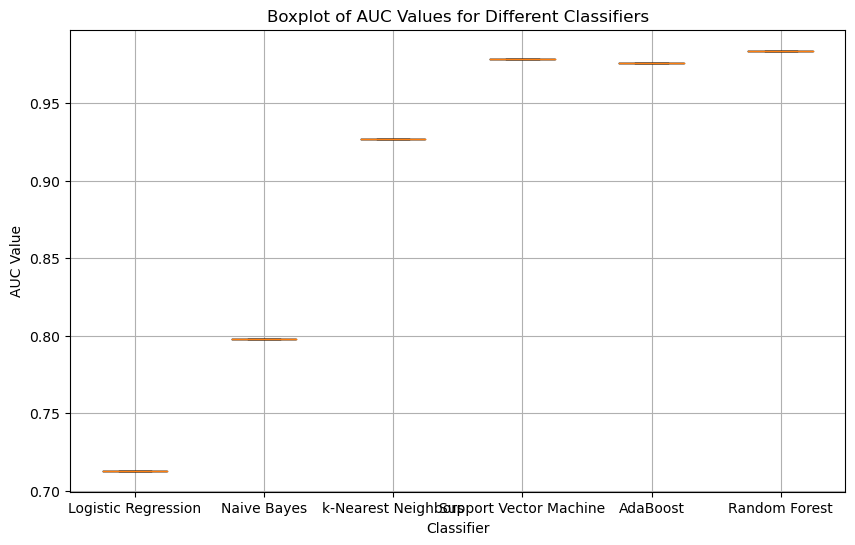

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

# Assuming you have your training and testing data stored in X_train, y_train, X_test, y_test

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier()
}

auc_values = {classifier_name: [] for classifier_name in classifiers}

# Train each classifier and calculate AUC on testing data
for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_prob = classifier.predict_proba(X_test)[:, 1]  # probability of the positive class
    auc = roc_auc_score(y_test, y_prob)
    auc_values[classifier_name].append(auc)

# Plot boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(auc_values.values(), labels=auc_values.keys())
plt.title('Boxplot of AUC Values for Different Classifiers')
plt.ylabel('AUC Value')
plt.xlabel('Classifier')
plt.grid(True)
plt.show()



# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_auc_score
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# # Initialize classifiers
# classifiers = {
#     "Naive Bayes": GaussianNB(),
#     "k-Nearest Neighbors": KNeighborsClassifier(),
#     "Logistic Regression": LogisticRegression(),
#     "Support Vector Machine": SVC(probability=True),
#     "Random Forest": RandomForestClassifier(),
#     "AdaBoost": AdaBoostClassifier()
# }

# # Train classifiers and compute AUC
# auc_values = {}
# for name, clf in classifiers.items():
#     clf.fit(X_train, y_train)
#     y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
#     auc = roc_auc_score(y_test, y_pred_proba)
#     auc_values[name] = auc

# # Create boxplot
# plt.figure(figsize=(10, 6))
# plt.boxplot(auc_values.values())
# plt.xticks(ticks=np.arange(1, len(auc_values) + 1), labels=auc_values.keys(), rotation=45)
# plt.ylabel('AUC Value')
# plt.title('Boxplot of AUC Values for Different Classification Algorithms')
# plt.grid(True)
# plt.show()
